# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 4</span>

## Simulazione di Dinamica Molecolare(MD) di un fluido con potenziale di interazione Lennard-Jones(LJ) nell'Ensemble MicroCanonico 

### Obiettivo

In questa esercitazione l'obiettivo consiste nel migliorare ed arricchire il codice di **dinamica molecolare**, inizialmente fornito,  al fine di simulare il comportamento di un sistema di particelle, un fluido con $N$ gradi di libertà, con un potenziale di interazione tipo Lennard Jones (potenziale a *corto raggio*) nell'ambito della meccanica statistica e nell'ensemble microcanonico, quindi, a fissato **numero di particelle** $N$, **volume** $V$, **energia** E, tre variabili di stato che caratterizzano la stato termodinamico del sistema all'equilibrio. Le nuove configurazioni, ossia l'evoluzione temporale dei gradi di libertà del sistema nel corso della simulazione, sono ottenute risolvendo le equazioni del moto in modo approssimato con un algoritmo numerico, detto di **Verlet**, che prima di tutto lascia invariata l'energia del sistema, un "must" nell'ensemble microcanonico.

### Richiami teorici

Lo scopo principale della **meccanica statistica** è quello di saper predire le proprietà macroscopiche di un sistema termodinamico, di solito all'equilibrio, a partire dalla conoscenza delle leggi microscopiche che governano le interazioni tra i gradi di libertà costituenti il sistema.

La conoscenza dello stato microscopico in cui si trova il sistema è spesso ignota. Gli unici vincoli a disposizione sono forniti dalla conoscenza di alcune, poche, quantità macroscopiche (energia, temperatura, volume, ecc..) che limitano il volume di esplorazione dello spazio delle fasi (spazio 6N-dimensionale) $\Gamma$, i cui elementi, detti punti rappresentativi $(\vec{q},\vec{p})$, raccolgono tutte le coordinate spaziali e dei momenti delle $N$ particelle costituenti il sistema specificandone lo stato microscopico.

Il formalismo della meccanica statistica sviluppato a partire dalla teoria degli Ensemble statistici e, spesso, accompagnato dall'ipotesi di ergodicità, permette di calcolare medie di insieme di opportune osservabili che caratterizzano le proprietà macroscopiche del sistema una volta nota la cosiddetta funzione densità o funzione di distribuzione dello spazio delle fasi $\rho(\vec{q},\vec{p},t)$. Quest'ultima rappresenta il modo in cui i membri di un ensemble, una collezione di sistemi statisitici caratterizzati dallo stesso macrostato ma da microstati differenti, sono distribuiti su tutti i possibili microstati, permessi dai vincoli, a diversi istanti temporali (infatti i punti rappresentativi di $\Gamma$ evolvono con lo scorrere del tempo disegnando traiettorie nello spazio delle fasi).

L'espressione generale per le medie di ensemble, opportunamente normalizzata, è qui di seguito riportata per una generica osservabile $f = f(\vec{q},\vec{p})$ funzione delle coordinate configurazionali e del momento:
$$
\langle f(\vec{q},\vec{p})\rangle = \frac{\int f(\vec{q},\vec{p}) \rho(\vec{q},\vec{p},t) d^{3N}q d^{3N}p}{\int \rho(\vec{q},\vec{p},t) d^{3N}q d^{3N}p} 
$$

In particolare un sistema all'equilibrio è rappresentao da una funzione densità invariante rispetto al tempo che qualifica un Ensemble come stazionario. Se si considera una $\rho(\vec{q},\vec{p},t) = cost$ indipendente da tutte le variabili da una parte si realizza la precedente condizione ed inoltre , dall'altra, tale scelta corrisponde a quella di un ensemble dove i suoi membri sono uniformmente distribuiti su tutti i possibili microstati permessi. Tale ensemble è detto, appunto, microcanonico.

Esso è caratterizzato dal possedere un valore dell'energia $E$ fissato e da una funzione densità:
$$
\rho(\vec{q},\vec{p}) = \begin{cases} k & \mbox{se } E < H(\vec{q},\vec{p}) < E + \Delta \\ 0 & \mbox{altrimenti}
\end{cases}
$$
con $k$ un valore costante, $\Delta$ l'incertezza sulla conoscenza del valore dell'energia e $H(\vec{q},\vec{p})$ il modello hamiltoniano adottato.

Nell'ensemble microcanonico(**NVE**) le medie di insieme sono ottenute con la seguente formula semplificando la funzione densità:
$$
\langle f(\vec{q},\vec{p})\rangle = \frac{\int f(\vec{q},\vec{p}) k d^{3N}q d^{3N}p}{\int k d^{3N}q d^{3N}p} = \frac{\int f(\vec{q},\vec{p}) d^{3N}q d^{3N}p}{\int d^{3N}q d^{3N}p}
$$
con la normalizzazione (il denominatore) che altro non rappresenta che la regione **rilevante** dello spazio delle fasi.


Solo pochi e semplici problemi di meccanica statistica possono essere risolti esattamente in maniera analitica, quando i sistemi diventano complessi (le funzioni che descrivono il potenziale di interazione diventano troppo complicate) bisogna affidarsi o a delle approsimazioni teoriche o, nella maggior parte dei casi, a tecniche di simulazione numerica.

La **Dinamica Molecolare** è la tecnica di simulazione introdotta e usata in questa esercitazione per risolvere uno specifico problema di meccanica statistica. Come anticipato in precedenza essa, noto il potenziale di interazione tra i gradi di libertà costituenti un sistema, simulando numericamente la risoluzione dell'equazioni del moto di Hamilton con opportune condizioni al contorno date dalla geometria e simmetria del sistema, genera informazioni sulle grandezze microscopiche che possono essere convertite in informazioni per le osservabili macroscopiche servendosi degli strumenti dati dalla meccanica statistica (medie di Ensemble). Gli integrali multidimensionali delle medie di ensemble in NVE sono risolti campionando le configurazioni (*Verlet*), permesse dai vincoli, dello spazio delle fasi e procedendo con tecniche Monte Carlo (vedi *Esercitazione 2*)

Nella seguente esercitazione il potenziale che descrive le interazioni tra le $N=108$ particelle costituenti che la tecnica riceve in input è modellizzato come un potenziale di interazione a coppie additivo del tipo **Lennard-Jones** (di solito usato per descrivere i *gas nobili*):
$$
V_{LJ}(r) = 4\epsilon [{(\frac{\sigma}{r})}^{12} - {(\frac{\sigma}{r})}^6] = 4[{(\frac{1}{r^*})}^{12} - {(\frac{1}{r^*})}^6] 
$$
con $\epsilon$ la profondità della buca di potenziale, $\sigma$ la distanza di separazione all'equilibrio tra la coppia di particelle coinvolte e dove l'ultima uguaglianza vale in unità ridotte $r^* = \frac{r}{\sigma}$.



La simulazione di MD consiste di due fasi (come in un esperimento reale):

1) EQUILIBRAZIONE: dopo aver selezionato un modello per un sistema si risolvono le quazioni del moto che lo descrivono fino a che le proprietà che lo caratterizzano non si modificano più durante l'evoluzione temporale.

2) MISURA REALE: vengono misurate le proprietà e le osservabili del sistema dopo aver raggiunto l'equilibrio.

La scelta dell'algoritmo per la risoluzione delle equazioni del moto è estremamente importante perchè deve:

- campionare punti rappresentativi dello spazio delle fasi nell'insieme microcanonico, cioè esplorare regioni di $\Gamma$ dove l'energia è conservata, in modo che le traiettorie prodotte ricadano nelle ipersuperfici ad $E$ fissata e possano essere utilizzate come contributi statistici per il calcolo delle medie di Ensemble.

- esplorare la regione permessa nel più breve tempo possibile senza perdere tempo a campionare punti rappresentativi al di fuori della regione rilevante (ancora una volta fondamentale la conservazione dell'energia) e questo è il grandissimo vantaggio offerto dalla simulazione rispetto a tecniche di quadratura standard (efficienza computazionale).

- permettere steps di integrazione sufficientemente lunghi e valutare le forze di interazione una volta per step

L'algoritmo che soddisfa al meglio le precedenti richieste è quello di **Verlet**: il metodo alle differenze finite più largamente diffuso con un espansione di Taylor fino al terzo ordine che fornisce il seguenete risultato 
$$
\vec{r}(t+\delta t) \simeq 2\vec{r}(t) - \vec{r}(t-\delta t) + {\delta t}^2\vec{a}(t) 
$$

Inoltre per simulare un sistema di **bulk** (e sbarazzarsi degli effetti scomodi di superficie) bisogna ricorrere alle **Periodic Boundary Condition(PBC)**: il box all'interno del quale si effettua la simulazione (per evitare che la particelle si allonatanino) viene replicato in tutto lo spazio in modo da formare un reticolo infinito. 

Queste ultime sono implementate con la seguente espressione $ Pbc(r) = r-box*rint(\frac{r}{box})$ che consente di gestire agevolmente le particelle che fuoriescono dalla scatola di simulazione sostituendole con le loro immagini che entrano dai box adiacenti, conservando la densità del box centrale(N). 

Tale sistema periodico corrisponde ad un sistema macroscopico se il potenziale di interazione soddisfa alcune condizioni.
Deve essere a corto raggio(LJ) per non risentire della smmetria del blocco e ad esso vengono applicate l'approssimazione detta di **convenzione di immagine manima** e il cosidetto **cut-off sferico** che annulla l'interazione tra le particelle a distanza maggiore di quella di cut-off $r_{cut-off}$.


Il codice fornito calcola  e stampa su file  i valori istantanei di 4 proprietà che caratterizzano lo stato termodinamico di equilibrio:

1) L'energia potenziale per particella $U/N$

2) L'energia cinetica per particella $K/N$

3) L'energia totale (interna) per particella $E/N$

4) La temperatura $T$

L'espressione per il calcolo dell temperatura è ricavata, dato il modello hamiltonina di riferimento, usando il teorema del **Viriale** nella sua forma di *equipartizione generalizzata* e conduce al seguente risultato (unità ridotte):
$$
T^* = \frac{2}{3} \langle K^* \rangle
$$

### Esercizio 04.01

Il primo esercizio chiede di migliorare il codice iniziale di MD permettendogli di **ripartire** leggendo da file non solo l'ultima configurazione sinora prodotta dalla simulazione ma anche quella precedente (dai file *config.0* e *old.0*) in modo da poter impiegare l'algoritmo di Verlet per riscalare le velocità e sovrascrivere la vecchia configurazione in modo da obbligare il sistema a "vivere" alla **temperatura desiderata**. A tal fine nel codice è stata inserita la routine *InputRestart()* che implementa tutti i passaggi necessari descritti nel Jupiter con la consegna dell'esercizio. 

Tale procedura deve essere in grado di garantire l'**equilibrazione** del sistema in modo tale che le proprietà macroscopiche che lo caratterizzano, quali per esempio la temperatura, non siano più soggette a cambiamenti ed oscillazioni (solo a fluttuazioni statistiche contenute intorno al valore target) con lo scorrere del tempo.

Se questo si verifica, si è raggiunto e realizzato l'equilibrio del sistema.

Il codice di MD esegue innazitutto l'inizializzazione del sistema mediante la routine *Input()* che legge tutti i parametri necessari per la simulazione dal file *input.dat* (che viene sovrascritto nel simulare le fasi con i file *input.solid* e *input.liquid*) e la configurazione di partenza dal file *config.0* in cui inizlamente viene copiato il file *config.fcc* che contiene una tipica configurazione di un reticolo cristallino fcc, quindi una struttura estremamente ordinata, per evitare di partire da configurazioni con sovrapposizioni di gradi di libertà i quali, una volta mossi usando come modello di interazione un potenziale del tipo LJ dall'algoritmo di Verlet, sarebbero sottoposti a forze impulsive che allugherebbero notevolmente il tempo necessario all'equilibraione del sistema. Di conseguenza, anche se le proprietà all'equilibrio non dovrebbero dipendere dalla scelta della configurazione di partenza (equivalenza dei microstati iniziale nell'ensemble microcanonico), risulta conveniente predisporre il sistema in una configurazione *favorevole* per simulare la fase desiderata. 


Nel codice modificato, la possibiltà di ripartire è ottenuta mediante l'inserimento nel file *input.dat* di una variabile restart che deve essere settata al valore:

- $restart = 0$ per la simulazione iniziale del sistema eseguita per $N_{steps} = 10^4$ temporali, misurando e salvando i valori di temperatura ogni 10 steps ( nei file *output_temp_istant_(phase).dat*). Alla conclusione di questa prima, necessaria, *run* la configurazione finale e quella precedente vengono salvate rispettivamente nei file *config.final* and *old.final* e copiate direttamente nei file *config.0* e *old.0* in modo da permettere la ripartenza immediata.

- $restart = 1$ per la fase di equilibrazione del sistema di durata $N_{steps} = 10^3$, ogni volta che si vuole ripartire per costringerlo a vivere ad una desiderata temperatura. Queste run più brevi vengono ripetute un numero di volte, che tipicamente dipende dalla fase che si intende simulare, sufficiente a portare il sistema allo stato termodinamico di equilibrio. I valori istantanei vengono salvati nei file *output_temp_istant_equi_(phase).dat*.

- $restart = 2$ per effettuare la simulazione che esegue la misura reale delle proprietà macroscopiche del sistema con un numero di blocchi $N_{blocks} = 100$ e con un $N_{steps} = 10^3$ per ciascun blocco(questo miglioramento sarà implementato nel successivo esercizio).

Le fasi simulate del fluido, in questa prima parte, sono quelle tipiche di un solido e di un liquido.

#### Solido

Qui di seguito vengono riportati i parametri di input per la fase solida che caratterizzano il sistema termodinamico e la simulazione. Le unità usate per esprimere le quantità termodinamiche sono quelle ridotte di LJ che sono molto convenienti perchè permettono di rappresentare molteplici stati identificati da combinazioni di valori delle osservabili molto diversi nel sistema internazionale (*legge degli stati corrispondenti*). Queste ultime si indicano con un asterisco ($*$) e fanno riferimento alle unità base contenute nell'espressione del potenziale di LJ ($\sigma, \epsilon, m$). I pararmetri sono: 

- $T^* = 1.4$ la temperartura alla quale si intende equilibrare il sistema (target)
- $N = 108$ numero di particelle costituenti il sistema
- $\rho^* = 1.1$ densità delle  particelle costituenti il fluido
- $ r_c^* = 2.2 $ raggio di cut-off
- $ t^* = 0.0005 $  intervallo temporale per l'integrazione delle equazioni del moto (nel SI $t = 0,108fs$)
- $N_{blocks} = 100$ numero dei blocchi della simulazione
- $N_{steps} = 10^3$ numero di passi per ciascun blocco
- $restart = 0,1 o 2$ la variabile per ricominciare

I prossimi plots illustrano l'andamento dei valori istantanei della temperatura del fluido nella fase solida per la prima run e per le successive run di equilibrazione. 

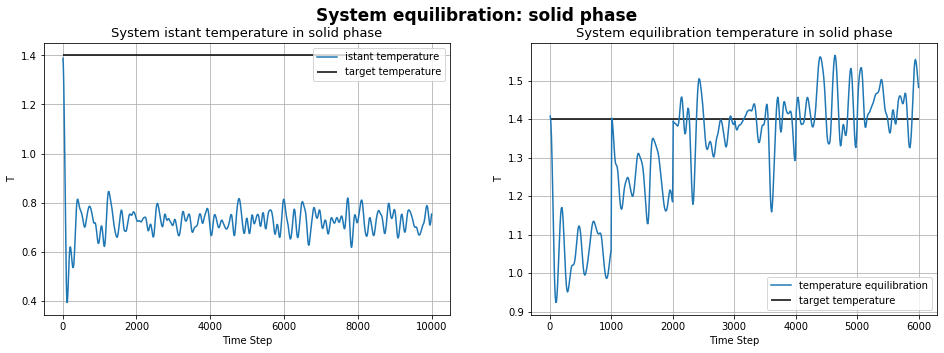

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# target Temperature
T = 1.4

temp_solid = np.loadtxt("Results/output_temp_istant_solid.dat", usecols=(1), unpack='true')
temp_solid_equi = np.loadtxt("Results/output_temp_istant_equi_solid.dat", usecols=(1), unpack='true')

x1=np.zeros(temp_solid.size)
for i in range(x1.size):
    x1[i]=(i+1)*10
x2=np.zeros(temp_solid_equi.size)
for i in range(x2.size):
    x2[i]=(i+1)*10

    
fig=plt.figure(figsize=(16,5))
plt.suptitle("System equilibration: solid phase", fontsize='17', weight='bold')

plt.subplot(121)
plt.hlines(T, 0, x1.size*10,label="target temperature")
plt.plot(x1,temp_solid,label="istant temperature")
plt.title("System istant temperature in solid phase", fontsize='13')
plt.xlabel('Time Step')
plt.ylabel('T')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.hlines(T, 0, x2.size*10,label="target temperature")
plt.plot(x2,temp_solid_equi,label="temperature equilibration")
plt.title("System equilibration temperature in solid phase", fontsize='13')
plt.xlabel('Time Step')
plt.ylabel('T')
plt.grid(True)
plt.legend()

plt.show()

- Si osserva (nel grafico di sinistra) che la temperatura nei primi passi si abbassa notevolmente prima di stabilizzarsi (200-300 time steps) fluttuando attorno ad un valore medio che, nella simulazione di partenza, non corrispode al target desiderato. La ragione di questo crollo risiede nel fatto che il sistema parte da una configurazione cristallina fcc estremamente ordinata molto vicina ad un minimo del potenziale che nel corso della dinamica non sarà più recuperabile dato che il sistema tende a disordinarsi. Dovendo conservarsi l'energia totale del sistema (ensemble microcanonico), se l'energia potenziale aumenta l'energia cinetica e quindi la temperatura devono necessariamente diminuire. 

- Si nota che per fare vivere il sistema all'equilibrio alla temperatura desiderata $T^*=1.4$ sono necessari 6 riscalamenti forzati delle velocità.

#### Liquido

Qui di seguito vengono riportati i parametri di input per la fase liquida che caratterizzano il sistema termodinamico e la simulazione.

- $T^* = 1.9$ la temperartura alla quale si intende equilibrare il sistema (target)
- $N = 108$ numero di particelle costituenti il sistema
- $\rho^* = 0.8$ densità delle  particelle costituenti il fluido
- $ r_c^* = 2.5 $ raggio di cut-off
- $ t^* = 0.0005 $  intervallo temporale per l'integrazione delle equazioni del moto (nel SI $t = 0,108fs$)
- $N_{blocks} = 100$ numero dei blocchi della simulazione
- $N_{steps} = 10^3$ numero di passi per ciascun blocco
- $restart = 0,1 o 2$ la variabile per ricominciare

I prossimi plots illustrano l'andamento dei valori istantanei della temperatura del fluido nella fase liquida per la prima run e per le successive run di equilibrazione. 

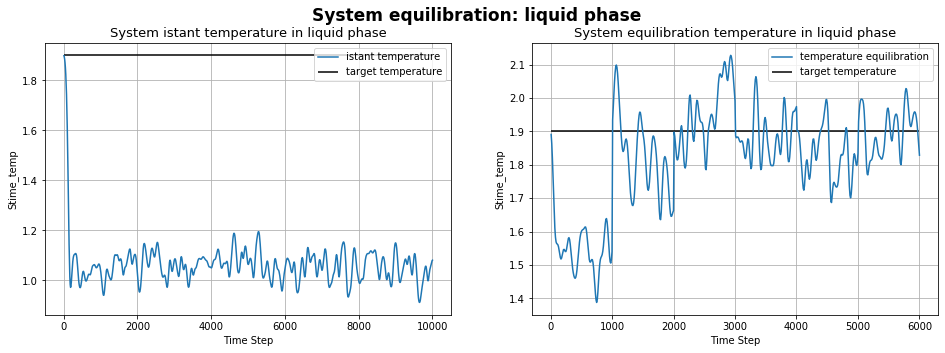

In [31]:
# target Temperature
T = 1.9

temp_liquid = np.loadtxt("Results/output_temp_istant_liquid.dat", usecols=(1), unpack='true')
temp_liquid_equi = np.loadtxt("Results/output_temp_istant_equi_liquid.dat", usecols=(1), unpack='true')

x1=np.zeros(temp_liquid.size)
for i in range(x1.size):
    x1[i]=(i+1)*10
x2=np.zeros(temp_liquid_equi.size)
for i in range(x2.size):
    x2[i]=(i+1)*10

    
fig=plt.figure(figsize=(16,5))
plt.suptitle("System equilibration: liquid phase", fontsize='17', weight='bold')

plt.subplot(121)
plt.hlines(T, 0, x1.size*10,label="target temperature")
plt.plot(x1,temp_liquid,label="istant temperature")
plt.title("System istant temperature in liquid phase", fontsize='13')
plt.xlabel('Time Step')
plt.ylabel('Stime_temp')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.hlines(T, 0, x2.size*10,label="target temperature")
plt.plot(x2,temp_liquid_equi,label="temperature equilibration")
plt.title("System equilibration temperature in liquid phase", fontsize='13')
plt.xlabel('Time Step')
plt.ylabel('Stime_temp')
plt.grid(True)
plt.legend()

plt.show()

- Per le analisi di questi due grafici valgono le medesime considerazioni svolte in precedenza in occasione della fase solida.

- Anche qui occorronno sei riscalamenti forzati per equilibrare il fluido a $T^*=1.9$

**N.B.**: Nel makefile sono presenti una serie di istruzioni per salvare, copiare, importare, configurare il sistema alla fine o all'inizio della simulazione.  

### Esercizio 04.02

Nella seconda parte dell'esercitazione il codice di dinamica molecolare viene ulteriormente rimaneggiato per permettere la stampa su opportuni nuovi file delle quattro proprietà di interesse del sistema calcolate mediante le medie a blocchi accompagnate dalle relative incertezze statistiche (sino ad ora infatti il codice stampava solo i valori istantanei delle osservabili).

Nel codice vengono quindi inserite e definite una serie di variabili e di routine quali *Reset()*, *Accumulate()*, *Averages()*, del tutto in sintonia con il codice che verrà utilizzato nell'esercitazione 7, che consentono di aggiornare progressivamente i valori medi delle osservabili al passare dei blocchi (gli "esperimenti") e di stimare le relative incertezze statistche con il *blocking method*. 

Suddividendo la simulazione effettiva del sistema ($restart=2$), una volta raggiunta l'equilibrazione, in un numero di blocchi $N_{blocks} = 100$ con numero di steps per ciascun blocco $N_{steps} = 10^3$ si salvano i valori medi (e le incertezze) determinati e aggiornati alla fine di ogni blocco per ciasuna delle quattro grandezze nei file *ave_(grandezza)_(phase).out*, sia per la fase solida che per quella liquida precedentemente equilibrate.

Le configurazioni di partenza per la simulazione del sistema sono quelle precedentemente ottenute e salvate una volta raggiunto l'equilibrio con gli opportuni riscalamenti sopra plottati. La routine che inizializza la simulazione reale è *InputFinal()*.

#### Solido

Qui di seguito sono riportati i grafici che illustrano l'andamento dei valori medi di tutte le 4 grandezze di interesse del sistema in funzione del numero di blocchi per il sistema nella fase solida, obbligato a vivere ad una temperatura di equilibrio $T^* = 1.4$.

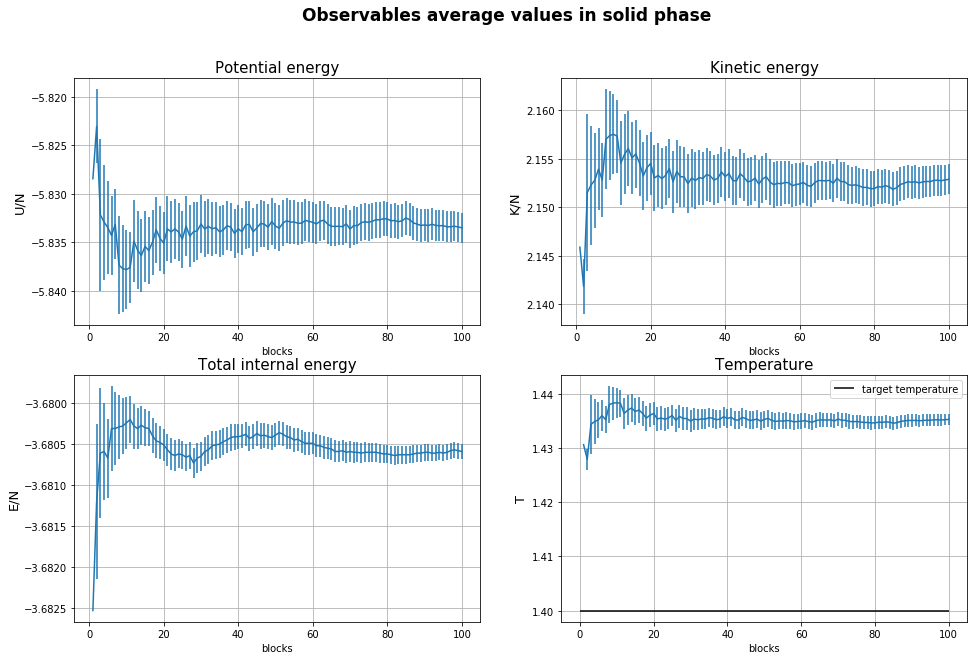

SOLID PHASE
Average value potential energy per particle(reduced unit): -5.833 +/- 0.002
Average value kinetic energy per particle(reduced unit): 2.153 +/- 0.00155
Average value total internal energy per particle(reduced unit): -3.681 +/- 0.0001
Average value temperature (reduced unit): 1.435 +/- 0.001


In [32]:
#Target temperature
T = 1.4

Blocks, epot, error_epot = np.loadtxt("Results/ave_epot_solid.out", usecols=(0,2,3), unpack='true')
Blocks, ekin, error_ekin = np.loadtxt("Results/ave_ekin_solid.out", usecols=(0,2,3), unpack='true')
Blocks, etot, error_etot = np.loadtxt("Results/ave_etot_solid.out", usecols=(0,2,3), unpack='true')
Blocks, temp, error_temp = np.loadtxt("Results/ave_temp_solid.out", usecols=(0,2,3), unpack='true')

fig=plt.figure(figsize=(16,10))
plt.suptitle("Observables average values in solid phase",fontsize='17', weight='bold')

    
plt.subplot(221)
plt.errorbar(Blocks, epot, yerr =error_epot)
plt.title("Potential energy",fontsize='15')
plt.xlabel('blocks')
plt.ylabel('U/N', size='13')
plt.grid(True)

plt.subplot(222)
plt.title("Kinetic energy",fontsize='15')
plt.errorbar(Blocks, ekin,  yerr =error_ekin)
plt.xlabel('blocks')
plt.ylabel('K/N', size='13')
plt.grid(True)


plt.subplot(223)
plt.errorbar(Blocks, etot,  yerr =error_etot)
plt.title("Total internal energy",fontsize='15')
plt.xlabel('blocks')
plt.ylabel('E/N', size='13')
plt.grid(True)

plt.subplot(224)
plt.title("Temperature",fontsize='15')
plt.errorbar(Blocks, temp,  yerr =error_temp)
plt.hlines(T, 0, Blocks.size,label="target temperature")
plt.xlabel('blocks')
plt.ylabel('T', size='13')
plt.grid(True)
plt.legend()

plt.show()

print ('SOLID PHASE')
print ('Average value potential energy per particle(reduced unit):', round(epot[Blocks.size-1],3), '+/-', round(error_epot[Blocks.size-1],3))
print ('Average value kinetic energy per particle(reduced unit):', round(ekin[Blocks.size-1],3), '+/-', round(error_ekin[Blocks.size-1],5))
print ('Average value total internal energy per particle(reduced unit):', round(etot[Blocks.size-1],3), '+/-', round(error_etot[Blocks.size-1],5))
print ('Average value temperature (reduced unit):', round(temp[Blocks.size-1],3), '+/-', round(error_temp[Blocks.size-1],3))


- La prima osservazione riguarda il grafico dei valori medi della temperatura. Essi non sono statisticamente compatibili con il valore di equilibrio desiderato. Tale situazione si verifica poichè l'equilibrazione è un processo manuale compiuto dal programmatore *ad occhio*, ossia valutando visivamente l'andamento e le oscillazioni dei valori istantanei della temperatura ad ogni riscalamento fino a quando essa non fluttua intorno alla temperatura terget della simulazione. La valutazione, inoltre, è eseguita su un numero di steps limitati per potere affermare con certezza che il valore si sia stabilizzato intorno a quello prestabilito, senza alcun tipo di controllo quantitativo che possa suggerire o meno il completamento effettivo della fase di equilibrazione. Si può, in effetti, notare dal grafico precedente, che riporta l'equilibrazione della fase solida, che gli ultimi valori di temperatura registrati sono superiori a $T^*=1.4$, infatti, il sistema simulato vive ad una temperatura costante maggiore $T_{sim} \simeq 1.43-1.44$ 


- Ponendo l'attenzione sui valori riportati lungo l'asse delle ascisse è possibile accorgersi che le incertezze assoiate ai valori medi dell'energia interna totale sono inferiori a quelle dell'energia potenziale e cinetica, a riprova che l'algoritmo di Verlet conserva su scale di tempi sufficientemente lunghi l'energia totale del sistema come deve essere quando si studia l'ensemble microcanonico.


- Infine si noti che la fase solida è dominata dall'energia potenziale rispetto alla componenete cinetica. Questa considerazione implica che le particelle del fluido in questa fase possono vibrare inotrno alle loro posizioni di equilibrio ma non si allontanano troppo dalla configurazione cristalina ordinata di partenza.

#### Liquido

Qui di seguito sono riportati i grafici che illustrano l'andamento dei valori medi di tutte le 4 grandezze di interesse del sistema in funzione del numero di blocchi per il sistema nella fase liquida obbligato a vivere ad una temperatura di equilibrio $T^* = 1.9$.

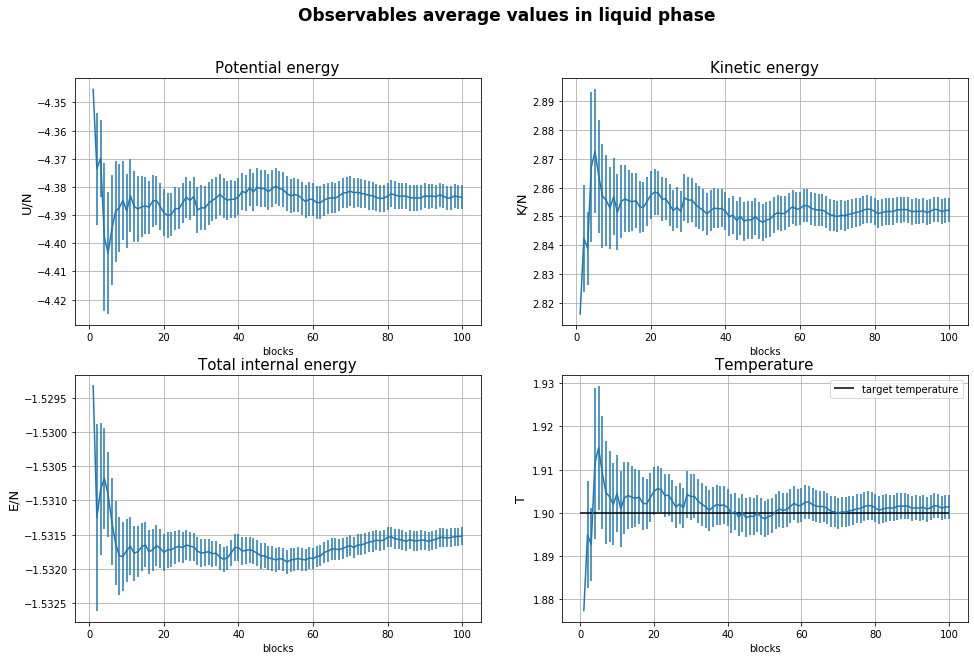

LIQUID PHASE
Average value potential energy per particle(reduced unit): -4.384 +/- 0.004
Average value kinetic energy per particle(reduced unit): 2.852 +/- 0.00421
Average value total internal energy per particle(reduced unit): -1.532 +/- 0.00013
Average value temperature (reduced unit): 1.901 +/- 0.003


In [33]:
#Target temperature
T = 1.9

Blocks, epot, error_epot = np.loadtxt("Results/ave_epot_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, ekin, error_ekin = np.loadtxt("Results/ave_ekin_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, etot, error_etot = np.loadtxt("Results/ave_etot_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, temp, error_temp = np.loadtxt("Results/ave_temp_liquid.out", usecols=(0,2,3), unpack='true')

fig=plt.figure(figsize=(16,10))
plt.suptitle("Observables average values in liquid phase",fontsize='17', weight='bold')

    
plt.subplot(221)
plt.errorbar(Blocks, epot, yerr =error_epot)
plt.title("Potential energy",fontsize='15')
plt.xlabel('blocks')
plt.ylabel('U/N', size='13')
plt.grid(True)

plt.subplot(222)
plt.title("Kinetic energy",fontsize='15')
plt.errorbar(Blocks, ekin,  yerr =error_ekin)
plt.xlabel('blocks')
plt.ylabel('K/N', size='13')
plt.grid(True)


plt.subplot(223)
plt.errorbar(Blocks, etot,  yerr =error_etot)
plt.title("Total internal energy",fontsize='15')
plt.xlabel('blocks')
plt.ylabel('E/N', size='13')
plt.grid(True)

plt.subplot(224)
plt.title("Temperature",fontsize='15')
plt.errorbar(Blocks, temp,  yerr =error_temp)
plt.hlines(T, 0, Blocks.size,label="target temperature")
plt.xlabel('blocks')
plt.ylabel('T', size='13')
plt.grid(True)
plt.legend()

plt.show()

print ('LIQUID PHASE')
print ('Average value potential energy per particle(reduced unit):', round(epot[Blocks.size-1],3), '+/-', round(error_epot[Blocks.size-1],3))
print ('Average value kinetic energy per particle(reduced unit):', round(ekin[Blocks.size-1],3), '+/-', round(error_ekin[Blocks.size-1],5))
print ('Average value total internal energy per particle(reduced unit):', round(etot[Blocks.size-1],3), '+/-', round(error_etot[Blocks.size-1],5))
print ('Average value temperature (reduced unit):', round(temp[Blocks.size-1],3), '+/-', round(error_temp[Blocks.size-1],3))


- Nella simulazione della fase liquida si osserva immediatamente che il processo di equilibrazione ha avuto maggiore successo rispetto alla fase analizzata in precedenza, nonostante il medesimo metro di valutazione. I valori medi della temperatura riportati nell'ultimo grafico risultano statisticamente compatibili con la temperaturata target di equilibrio a cui si voleva forzare il sistema. Tale risultato evidenzia come il controllo manuale sul raggiungimento della configurazione di equilibrio sia poco accurato e soggetto a forti variazioni, una strategia con una scarso ed impreciso valore predittivo.


- Per il resto si possono fare analoghe considerazioni, sottolinenando che nella fase liquida domina ancora l'energia potenziale (anche se in misura minore che nella fase solida) essendo l'energia totale ancora negativa, consentendo però ai gradi di libertà di muoversi più liberamente ma senza seguire una dinamica eccessivamente disordinata(tipica della fase gassosa). 

### Esercizio 04.3

Nell'ultimo esercizio, forti del codice di MD appena modificato e migliorato, viene effettuata l'equilibrazione e la simulazione di un fluido specifico, Argon (con unità di LJ $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), nelle seguenti fasi di equilibrio termodinamico:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

per studiarne le 4 proprietà termodinamiche di interesse in questa esercitazione.

Si ricordi che i risultati ottenuti dalla simulazione in unità ridotte permettono di studiare, potenzialmente, qualsiasi sistema modellizzabile via un potenziale di interazione di tipo LJ, come per esempio i **Gas Nobili**(tranne l'elio).

Le uniche modifiche apportate al codice sono le creazione di nuovi file di input (*input_Argon.(phase)*) contenenti i nuovi parametri da inizializzare (che verrano copiati nel file *input.dat* con l'opportuno comando import del makefile) e di nuove istruzioni nel makefile per importare(*config_*), salvare(*save_*) le nuove e le vecchie configurazioni posizionali prodotte e per cancellare i nuovi file di output prodotti sia per l'equilibrazione (temperatura) che la simulazione effettiva (*ave_(grandezza)_Argon_(phase).out, output_temp_istant_Argon_(phase).dat,output_temp_istant_equi_Argon_(phase).dat).

Seguendo un procedimento analogo alla prima parte dell'esercitazione si procede, per ciascuna fase, partendo da una configurazone iniziale del tipo fcc(restart=0), all'equilibrazione del sistema riscalando (restart=1) le velocità ad ogni ripartenza fino a stabilizzare i valori istantanei di temperatura intorno a quella scelta come target di equilibrio per simulare l'opportuna fase del fluido. Dopo aver salvato la configurazione di equilibrio, questa viene copiata come configurazione di partenza preparando il sistema alla simulazione effettiva (restart=2) che produrrà in output i valori medi delle 4 grandezze accompagnati della relative incertezze statistiche (*output_(grandezza)_Argon_(phase).out*) in funzione del numero crescente di blocchi della simulazione (con l'accortezza di modificare il nome dei file di output nel codice in funzione della fase simulata).

Di seguito vengono riportati e plottati i risultati di tutte le equilibrazioni e simulazioni di ciascuna fase procedendo nel seguente ordine: solido,liquido,gas.

Le grandezze mediate saranno riporate in unità del **Sistema Internazionale**.


### Argon: fase solida

- $N_{stepsin} = 10^4$ per la prima run
- $N_{stepseq} = 10^3$ ad ogni ripartenza
- $N_{blocks} = 100$    
- $N_{steps} = 10^3$  

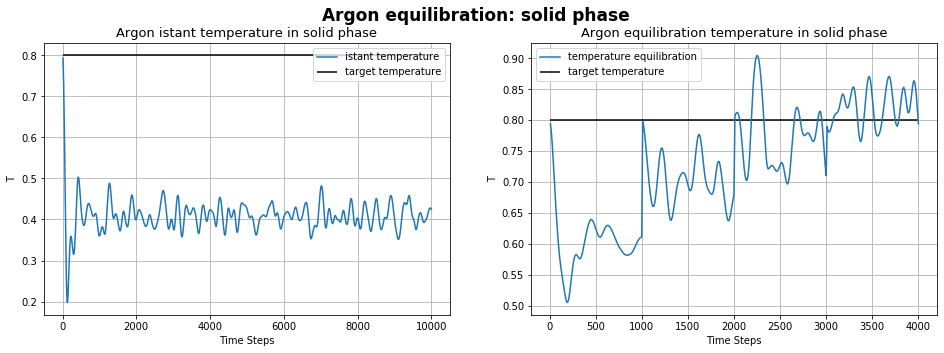

In [34]:
#equilibration
T = 0.8

temp_argon_solid = np.loadtxt("Results_Argon/output_temp_istant_Argon_solid.dat", usecols=(1), unpack='true')
temp_argon_solid_equi = np.loadtxt("Results_Argon/output_temp_istant_equi_Argon_solid.dat", usecols=(1), unpack='true')

x1=np.zeros(temp_argon_solid.size)
for i in range(x1.size):
    x1[i]=(i+1)*10
x2=np.zeros(temp_argon_solid_equi.size)
for i in range(x2.size):
    x2[i]=(i+1)*10

    
fig=plt.figure(figsize=(16,5))
plt.suptitle("Argon equilibration: solid phase", fontsize='17', weight='bold')

plt.subplot(121)
plt.hlines(T, 0, x1.size*10,label="target temperature")
plt.plot(x1,temp_argon_solid,label="istant temperature")
plt.title("Argon istant temperature in solid phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()


plt.subplot(122)
plt.hlines(T, 0, x2.size*10,label="target temperature")
plt.plot(x2,temp_argon_solid_equi,label="temperature equilibration")
plt.title("Argon equilibration temperature in solid phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()

plt.show()


- Le considerazioni che si possono fare sono analoghe a quelle riportate nella sezione precedente. In particolare, si osservi che sono necessari 4 riscalamenti forzati della velocità del sistema per costringerlo a farlo vivere alla temperatura di equilibrio $T=0.8$.

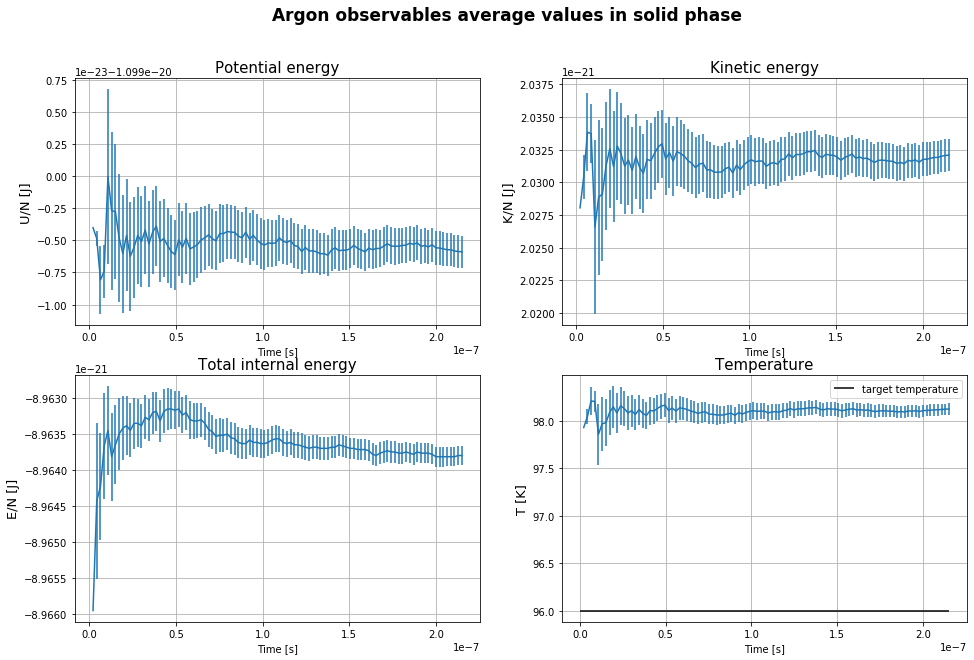

SOLID PHASE
Average value potential energy per particle(reduced unit): -6.637 +/- 0.001
Average value potential energy per particle(Argon): -1.0996000000000001e-20 +/- 1.0000000000000001e-24
Average value kinetic energy per particle(reduced unit): 1.227 +/- 0.00074
Average value kinetic energy per particle(Argon): 2.032e-21 +/- 1.0000000000000001e-24
Average value total internal energy per particle(reduced unit): -5.41 +/- 8e-05
Average value total internal energy per particle(Argon): -8.964e-21 +/- 0.0
Average value temperature (reduced unit): 0.818 +/- 0.0
Average value temperature (Argon): 98.12268 +/- 0.05908


In [35]:
#LJ unit vs SI unit
sigma = 0.34*(10**(-9)) # m , unità di lungheza
m = 39.948*1.66053873*(10**(-27)) # kg, unità di massa
K_b = 1.380649*(10**(-23)) # j/K , costante di Boltzmann
epsilon = 120*K_b # J, unità di energia
t = sigma*math.sqrt(m/epsilon) # s , unità di tempo
S = 1000 # steps number for each block

T = 0.8

Blocks, epot, error_epot = np.loadtxt("Results_Argon/ave_epot_Argon_solid.out", usecols=(0,2,3), unpack='true')
Blocks, ekin, error_ekin = np.loadtxt("Results_Argon/ave_ekin_Argon_solid.out", usecols=(0,2,3), unpack='true')
Blocks, etot, error_etot = np.loadtxt("Results_Argon/ave_etot_Argon_solid.out", usecols=(0,2,3), unpack='true')
Blocks, temp, error_temp = np.loadtxt("Results_Argon/ave_temp_Argon_solid.out", usecols=(0,2,3), unpack='true')


fig=plt.figure(figsize=(16,10))
plt.suptitle("Argon observables average values in solid phase",fontsize='17', weight='bold')



    
plt.subplot(221)
plt.errorbar(Blocks*t*S,epot*epsilon,error_epot*epsilon)
plt.title("Potential energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('U/N [J]',size='13')
plt.grid(True)

plt.subplot(222)
plt.title("Kinetic energy",fontsize='15')
plt.errorbar(Blocks*t*S,ekin*epsilon,error_ekin*epsilon)
plt.xlabel('Time [s]')
plt.ylabel('K/N [J]',size='13')
plt.grid(True)


plt.subplot(223)
plt.errorbar(Blocks*t*S,etot*epsilon,error_etot*epsilon)
plt.title("Total internal energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('E/N [J]',size='13')
plt.grid(True)

plt.subplot(224)
plt.title("Temperature",fontsize='15')
plt.errorbar(Blocks*t*S,temp*120,error_temp*120)
plt.hlines(T*120, 0, Blocks.size*t*S,label="target temperature")
plt.xlabel('Time [s]')
plt.ylabel('T [K]',size='13')
plt.grid(True)
plt.legend()

plt.show()

print ('SOLID PHASE')
print ('Average value potential energy per particle(reduced unit):', round(epot[Blocks.size-1],3), '+/-', round(error_epot[Blocks.size-1],3))
print ('Average value potential energy per particle(Argon):', round(epot[Blocks.size-1]*epsilon,24), '+/-', round(error_epot[Blocks.size-1]*epsilon,24))
print ('Average value kinetic energy per particle(reduced unit):', round(ekin[Blocks.size-1],3), '+/-', round(error_ekin[Blocks.size-1],5))
print ('Average value kinetic energy per particle(Argon):', round(ekin[Blocks.size-1]*epsilon,24), '+/-', round(error_ekin[Blocks.size-1]*epsilon,24))
print ('Average value total internal energy per particle(reduced unit):', round(etot[Blocks.size-1],3), '+/-', round(error_etot[Blocks.size-1],5))
print ('Average value total internal energy per particle(Argon):', round(etot[Blocks.size-1]*epsilon,24), '+/-', round(error_etot[Blocks.size-1]*epsilon,24))
print ('Average value temperature (reduced unit):', round(temp[Blocks.size-1],3), '+/-', round(error_temp[Blocks.size-1],3))
print ('Average value temperature (Argon):', round(temp[Blocks.size-1]*120,5), '+/-', round(error_temp[Blocks.size-1]*120,5))

- Le analisi e i commenti di questi plot sono equivalenti a quelli svolti per una fase solida generica del fluido nella precedente sezione.

- Si noti, comunque, che i grafici riportano le grandezze convertite in unità del sistema internazionale e che la temperatura a cui viene simulata la fase solida del sistema è superiore (2K circa) a quella *target*, indice della difficoltà intrinseche nell'operare un controllo manuale e visivo per validare il raggiungimento dell'equilibrio.

### Argon: fase liquida

- $N_{stepsin} = 10^4$ per la prima run
- $N_{stepseq} = 10^3$ ad ogni ripartenza
- $N_{blocks} = 100$    
- $N_{steps} = 10^3$

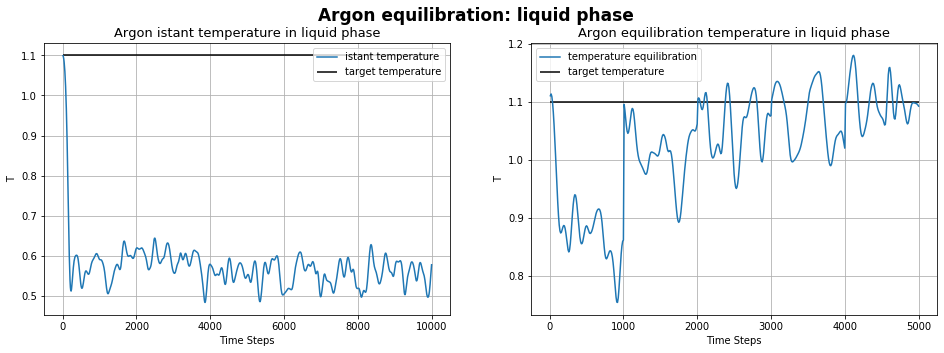

In [36]:
#equilibration

T = 1.1

temp_argon_liquid = np.loadtxt("Results_Argon/output_temp_istant_Argon_liquid.dat", usecols=(1), unpack='true')
temp_argon_liquid_equi = np.loadtxt("Results_Argon/output_temp_istant_equi_Argon_liquid.dat", usecols=(1), unpack='true')

x1=np.zeros(temp_argon_liquid.size)
for i in range(x1.size):
    x1[i]=(i+1)*10
x2=np.zeros(temp_argon_liquid_equi.size)
for i in range(temp_argon_liquid_equi.size):
    x2[i]=(i+1)*10

    
fig=plt.figure(figsize=(16,5))
plt.suptitle("Argon equilibration: liquid phase", fontsize='17', weight='bold')

plt.subplot(121)
plt.hlines(T, 0, x1.size*10,label="target temperature")
plt.plot(x1,temp_argon_liquid,label="istant temperature")
plt.title("Argon istant temperature in liquid phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()


plt.subplot(122)
plt.hlines(T, 0, x2.size*10,label="target temperature")
plt.plot(x2,temp_argon_liquid_equi,label="temperature equilibration")
plt.title("Argon equilibration temperature in liquid phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()

plt.show()

- Si osservi che, nella fase liquida sono necessari 5 riscalamenti forzati della velocità del sistema per costringerlo a vivere alla temperatura di equilibrio desiderata $T=1.1$, un numero maggiore rispetto al precedente. Trattatandosi infatti di una fase più disordinata di quella solida il procedimento di equilibrazione richiederà un tempo maggiore. Si noti inoltre che le fluttuazioni dei valori istantanei attorno al valore desiderato sono più ampie rispetto a quelle plottate nella fase solida.

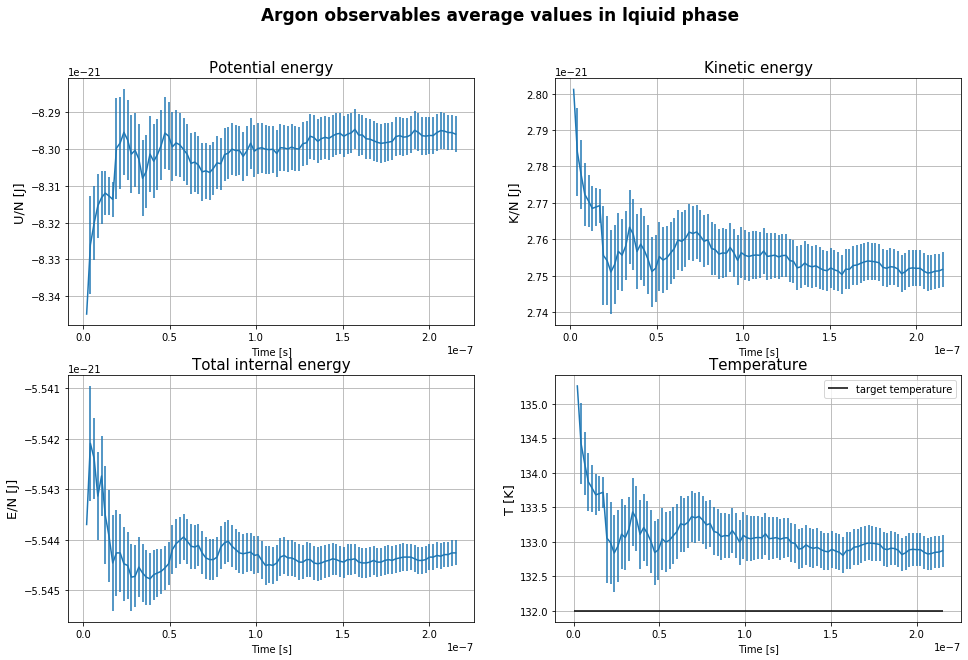

LIQUID PHASE
Average value potential energy per particle(reduced unit): -5.007 +/- 0.003
Average value potential energy per particle(Argon): -8.296e-21 +/- 5e-24
Average value kinetic energy per particle(reduced unit): 1.661 +/- 0.00287
Average value kinetic energy per particle(Argon): 2.752e-21 +/- 5e-24
Average value total internal energy per particle(reduced unit): -3.346 +/- 0.00015
Average value total internal energy per particle(Argon): -5.544e-21 +/- 2.5000000000000003e-25
Average value temperature (reduced unit): 1.107 +/- 0.002
Average value temperature (Argon): 132.8688 +/- 0.2294232


In [37]:
T = 1.1

Blocks, epot, error_epot = np.loadtxt("Results_Argon/ave_epot_Argon_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, ekin, error_ekin = np.loadtxt("Results_Argon/ave_ekin_Argon_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, etot, error_etot = np.loadtxt("Results_Argon/ave_etot_Argon_liquid.out", usecols=(0,2,3), unpack='true')
Blocks, temp, error_temp = np.loadtxt("Results_Argon/ave_temp_Argon_liquid.out", usecols=(0,2,3), unpack='true')


fig=plt.figure(figsize=(16,10))
plt.suptitle("Argon observables average values in lqiuid phase",fontsize='17', weight='bold')



    
plt.subplot(221)
plt.errorbar(Blocks*t*S,epot*epsilon,error_epot*epsilon)
plt.title("Potential energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('U/N [J]',size='13')
plt.grid(True)

plt.subplot(222)
plt.title("Kinetic energy",fontsize='15')
plt.errorbar(Blocks*t*S,ekin*epsilon,error_ekin*epsilon)
plt.xlabel('Time [s]')
plt.ylabel('K/N [J]',size='13')
plt.grid(True)


plt.subplot(223)
plt.errorbar(Blocks*t*S,etot*epsilon,error_etot*epsilon)
plt.title("Total internal energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('E/N [J]',size='13')
plt.grid(True)

plt.subplot(224)
plt.title("Temperature",fontsize='15')
plt.errorbar(Blocks*t*S,temp*120,error_temp*120)
plt.hlines(T*120, 0, Blocks.size*t*S,label="target temperature")
plt.xlabel('Time [s]')
plt.ylabel('T [K]',size='13')
plt.grid(True)
plt.legend()

plt.show()

print ('LIQUID PHASE')
print ('Average value potential energy per particle(reduced unit):', round(epot[Blocks.size-1],3), '+/-', round(error_epot[Blocks.size-1],3))
print ('Average value potential energy per particle(Argon):', round(epot[Blocks.size-1]*epsilon,24), '+/-', round(error_epot[Blocks.size-1]*epsilon,24))
print ('Average value kinetic energy per particle(reduced unit):', round(ekin[Blocks.size-1],3), '+/-', round(error_ekin[Blocks.size-1],5))
print ('Average value kinetic energy per particle(Argon):', round(ekin[Blocks.size-1]*epsilon,24), '+/-', round(error_ekin[Blocks.size-1]*epsilon,24))
print ('Average value total internal energy per particle(reduced unit):', round(etot[Blocks.size-1],3), '+/-', round(error_etot[Blocks.size-1],5))
print ('Average value total internal energy per particle(Argon):', round(etot[Blocks.size-1]*epsilon,24), '+/-', round(error_etot[Blocks.size-1]*epsilon,26))
print ('Average value temperature (reduced unit):', round(temp[Blocks.size-1],3), '+/-', round(error_temp[Blocks.size-1],3))
print ('Average value temperature (Argon):', round(temp[Blocks.size-1]*120,24), '+/-', round(error_temp[Blocks.size-1]*120,24))

- In aggiunta alle solite considerazioni, si può ancora osservare che l'equilibrazione della fase liquida è stata più *fortunata* e che la temperatura a cui viene simulato il sistema non è troppo lontana da quella target (2-3 deviazioni standard). 

### Argon: fase gassosa

- $N_{stepsin} = 10^4$ per la prima run
- $N_{stepseq} = 10^3$ ad ogni ripartenza
- $N_{blocks} = 100$    
- $N_{steps} = 10^4$

Si è deciso di incrementare il numero di steps per blocco avendo osservato una maggiore correlazione tra i valori istantanei delle grandezze misurate. Aumenatndo tale variabile viene assicurata la validità del teorema del limite centrale per il calcolo delle incertezzee la maggiore accurateeza nella stima dei valori medi.

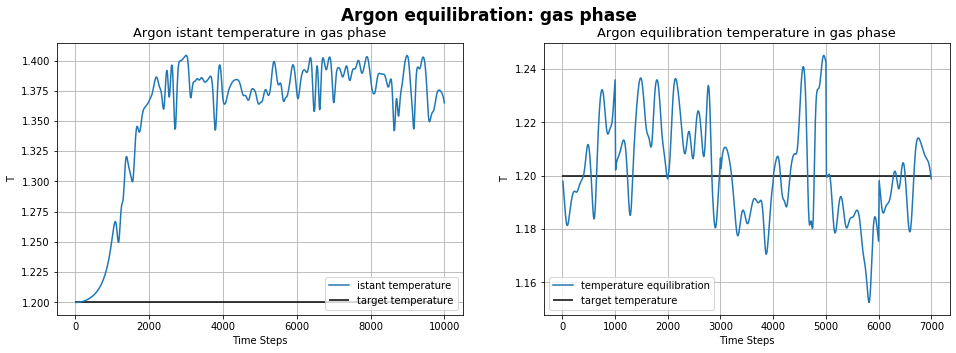

In [38]:
#equilibration

T = 1.2

temp_argon_gas = np.loadtxt("Results_Argon/output_temp_istant_Argon_gas.dat", usecols=(1), unpack='true')
temp_argon_gas_equi = np.loadtxt("Results_Argon/output_temp_istant_equi_Argon_gas.dat", usecols=(1), unpack='true')

x1=np.zeros(temp_argon_gas.size)
for i in range(x1.size):
    x1[i]=(i+1)*10
x2=np.zeros(temp_argon_gas_equi.size)
for i in range(x2.size):
    x2[i]=(i+1)*10

    
fig=plt.figure(figsize=(16,5))
plt.suptitle("Argon equilibration: gas phase", fontsize='17', weight='bold')

plt.subplot(121)
plt.hlines(T, 0, x1.size*10,label="target temperature")
plt.plot(x1,temp_argon_gas,label="istant temperature")
plt.title("Argon istant temperature in gas phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()


plt.subplot(122)
plt.hlines(T, 0, x2.size*10,label="target temperature")
plt.plot(x2,temp_argon_gas_equi,label="temperature equilibration")
plt.title("Argon equilibration temperature in gas phase", fontsize='13')
plt.xlabel('Time Steps')
plt.ylabel('T')
plt.grid(True)
plt.legend()

plt.show()

- Gli andamenti dei valori istantanei simulando la fase gassosa dell'Argon risultano un po' diversi. Si osserva che la temperatura, invece di crollare nei primi steps MC, cresce prima di stabilizzarsi.

- Occorrono 7 riscalamenti forzati prima di raggiungere, ragionevolmente, la temperatura di equilibrio desiderata $T^*=1.2$ per simulare la fase gassossa dell'Argon. Le fluttuazioni intorno al valore target sono comunque consistenti (anche procedendo con ulteriori riscalamenti è difficile visionare condizioni più stabili).

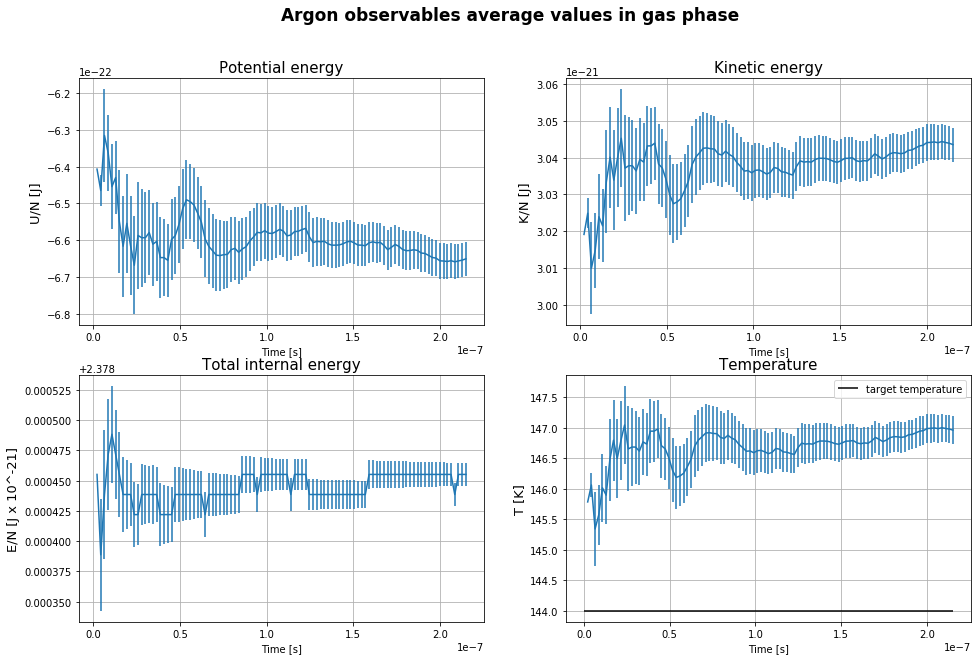

GAS PHASE
Average value potential energy per particle(reduced unit): -0.401 +/- 0.003
Average value potential energy per particle(Argon): -6.6500000000000005e-22 +/- 5e-24
Average value kinetic energy per particle(reduced unit): 1.837 +/- 0.0028
Average value kinetic energy per particle(Argon): 3.044e-21 +/- 5e-24
Average value total internal energy per particle(reduced unit): 1.436 +/- 1e-05
Average value total internal energy per particle(Argon): 2.378e-21 +/- 1.0000000000000002e-26
Average value temperature (reduced unit): 1.225 +/- 0.002
Average value temperature (Argon): 146.9604 +/- 0.2241192


In [43]:
T = 1.2

Blocks, epot, error_epot = np.loadtxt("Results_Argon/ave_epot_Argon_gas.out", usecols=(0,2,3), unpack='true')
Blocks, ekin, error_ekin = np.loadtxt("Results_Argon/ave_ekin_Argon_gas.out", usecols=(0,2,3), unpack='true')
Blocks, etot, error_etot = np.loadtxt("Results_Argon/ave_etot_Argon_gas.out", usecols=(0,2,3), unpack='true')
Blocks, temp, error_temp = np.loadtxt("Results_Argon/ave_temp_Argon_gas.out", usecols=(0,2,3), unpack='true')


fig=plt.figure(figsize=(16,10))
plt.suptitle("Argon observables average values in gas phase",fontsize='17', weight='bold')


 
plt.subplot(221)
plt.errorbar(Blocks*t*S,epot*epsilon, yerr = error_epot*epsilon)
plt.title("Potential energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('U/N [J]',size='13')
plt.grid(True)

plt.subplot(222)
plt.title("Kinetic energy",fontsize='15')
plt.errorbar(Blocks*t*S,ekin*epsilon, yerr = error_ekin*epsilon)
plt.xlabel('Time [s]')
plt.ylabel('K/N [J]',size='13')
plt.grid(True)


plt.subplot(223)
plt.errorbar(Blocks*t*S,etot*epsilon*(10**21), yerr = error_etot*epsilon*(10**21))
plt.title("Total internal energy",fontsize='15')
plt.xlabel('Time [s]')
plt.ylabel('E/N [J x 10^-21]',size='13')
plt.grid(True)

plt.subplot(224)
plt.title("Temperature",fontsize='15')
plt.errorbar(Blocks*t*S,temp*120,error_temp*120)
plt.hlines(T*120, 0, Blocks.size*t*S,label="target temperature")
plt.xlabel('Time [s]')
plt.ylabel('T [K]',size='13')
plt.grid(True)
plt.legend()

plt.show()

print ('GAS PHASE')
print ('Average value potential energy per particle(reduced unit):', round(epot[Blocks.size-1],3), '+/-', round(error_epot[Blocks.size-1],3))
print ('Average value potential energy per particle(Argon):', round(epot[Blocks.size-1]*epsilon,24), '+/-', round(error_epot[Blocks.size-1]*epsilon,24))
print ('Average value kinetic energy per particle(reduced unit):', round(ekin[Blocks.size-1],3), '+/-', round(error_ekin[Blocks.size-1],5))
print ('Average value kinetic energy per particle(Argon):', round(ekin[Blocks.size-1]*epsilon,24), '+/-', round(error_ekin[Blocks.size-1]*epsilon,24))
print ('Average value total internal energy per particle(reduced unit):', round(etot[Blocks.size-1],3), '+/-', round(error_etot[Blocks.size-1],5))
print ('Average value total internal energy per particle(Argon):', round(etot[Blocks.size-1]*epsilon,24), '+/-', round(error_etot[Blocks.size-1]*epsilon,26))
print ('Average value temperature (reduced unit):', round(temp[Blocks.size-1],3), '+/-', round(error_temp[Blocks.size-1],3))
print ('Average value temperature (Argon):', round(temp[Blocks.size-1]*120,24), '+/-', round(error_temp[Blocks.size-1]*120,24))

- Dal grafico dell'energia si osserva che la variazione nei valori è così limitata che nemmeno la ventissettesima cifra decimale riesce a risolverla facendo sembrare che per certi intervalli temporali non vari. 

N.B.: Il problema è negli output dati dal programma ma on sono riuscito ad ottenre risutati più precisi di quest'ultimo.